In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, execute, Aer, IBMQ, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Basic Functions for Display Purposes

def print_statevector(qstate):
    for i in range(len(qstate)):
        if qstate[i] < 0:
            print((str(round(qstate[i],3))+"|"+bin(i)[2:]+"> "),end="  ")
        else:
            print((str(round(qstate[i],3))+"|"+bin(i)[2:]+"> "),end="  ")
            
def sv_simulate_circuit(qc):            
    backend = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use 
    job = execute(qc,backend) # Put in the name of your quantum circuit where it says qc
    result = job.result() 

    state = np.asarray(result.get_statevector())
    
    amplitude_list = []
    for amplitude in state:
        amplitude_list.append(np.round(amplitude,3))
        
    return amplitude_list

def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc,backend, shots = 1024)
    result = job.result()         
    return result.get_counts()



In [3]:
def exercise_1():
    """ Goal: Transform the state of a single qubit to |1>. """
    qc = QuantumCircuit(1)
    qc.x(0)
    return sv_simulate_circuit(qc)

In [4]:
#---- Exercise 1 Test -----------------------

try:
    assert exercise_1() == [0j, (1+0j)]
    print("------- CONGRATULATIONS! -------")
except:
    print("-------  Incorrect Code  -------")

------- CONGRATULATIONS! -------


In [6]:
def exercise_2():
    """ Goal: Transform the state of a single qubit to |->. """
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    return sv_simulate_circuit(qc)

In [7]:
#---- Exercise 2 Test ------------------------------    
    
try:
    assert exercise_2() == [(0.707+0j), (-0.707-0j)]
    print("------- CONGRATULATIONS! -------")
except:
    print("-------  Incorrect Code  -------")

------- CONGRATULATIONS! -------


In [9]:
def exercise_3(num_of_qubits):
    """ Goal: rotate each qubit around the Y axis by 15° (π/12 radians), multiplied by its index in the array. """
    
    num_of_bits = num_of_qubits
    
    qreg = QuantumRegister(num_of_qubits)
    creg = ClassicalRegister(num_of_bits)
    
    qc = QuantumCircuit(qreg, creg)
    for idx in range(num_of_qubits):
        qc.ry(np.pi*idx/12, idx)
    return sv_simulate_circuit(qc)

In [10]:
#---- Exercise 3 Test ------------------------------
    
try:
    assert exercise_3(1) == [(1+0j), 0j]
    assert exercise_3(3) == [(0.958+0j), 0j, (0.126+0j), 0j, (0.257+0j), 0j, (0.034+0j), 0j]
    assert len(exercise_3(6)) == 64
    print("------- CONGRATULATIONS! -------")
except:
    print("-------  Incorrect Code  -------")

------- CONGRATULATIONS! -------


In [13]:
def swap_test():
    """ Do the following steps: 
        1. Create a quantum circuit with three qubits - name the first "ancilla" and the other two "qubit" 
        2. Rotate the first qubit 7π/12 rad about the y-axis
        3. Rotate the second qubit π/2 rad about the y-axis
        4. Place the Hadamard gate on the ancilla
        5. Then place a controlled-SWAP (CSWAP) gate such that the control is on the ancilla. 
        6. Then place another Hadamard gate on the ancilla. 
        7. The rest has been done already
    """
    anc = AncillaRegister(1, 'ancilla')
    qreg = QuantumRegister(2, 'qubit')
    creg = ClassicalRegister(1, 'bit') 
    
    angle_1 = 5*np.pi/12
    angle_2 = 6*np.pi/12
    
    qc = QuantumCircuit(anc, qreg, creg)
    qc.ry(angle_1, 1)
    qc.ry(angle_2, 2)
    
    qc.h(0)
    qc.cswap(0,1,2)
    qc.h(0)
    qc.measure(0,0)
    
    return aer_simulate_circuit(qc)

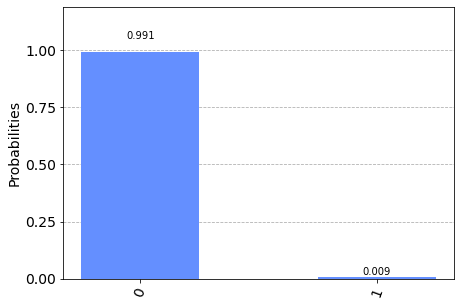

In [14]:
plot_histogram(exercise_4()) 